In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt



In [130]:
# calculate the cost function: 

def cost(w0,w1):
    return (1-(w0+w1*1))**2+(3-(w0+w1*3))**2+(7-(w0+w1*8))**2+(8-(w0+w1*7))**2+(10-(w0+w1*9))**2

SHAPE=40
w0=np.linspace(-.5,.5,SHAPE)
w0=np.outer(w0,np.ones(SHAPE))
w1=np.linspace(.85,1.25,SHAPE)
w1=np.outer(w1,np.ones(SHAPE)).T

#calculate the Z axes: 
vCost=np.vectorize(cost)
costArray=vCost(w0,w1)

In [53]:
print(w0)
print(w1)

[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-0.94871795 -0.94871795 -0.94871795 ..., -0.94871795 -0.94871795
  -0.94871795]
 [-0.8974359  -0.8974359  -0.8974359  ..., -0.8974359  -0.8974359
  -0.8974359 ]
 ..., 
 [ 0.8974359   0.8974359   0.8974359  ...,  0.8974359   0.8974359
   0.8974359 ]
 [ 0.94871795  0.94871795  0.94871795 ...,  0.94871795  0.94871795
   0.94871795]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.05128205  0.05128205  0.05128205 ...,  0.05128205  0.05128205
   0.05128205]
 [ 0.1025641   0.1025641   0.1025641  ...,  0.1025641   0.1025641
   0.1025641 ]
 ..., 
 [ 1.8974359   1.8974359   1.8974359  ...,  1.8974359   1.8974359
   1.8974359 ]
 [ 1.94871795  1.94871795  1.94871795 ...,  1.94871795  1.94871795
   1.94871795]
 [ 2.          2.          2.         ...,  2.          2.          2.        ]]


In [128]:
costArray.shape

(40, 40)

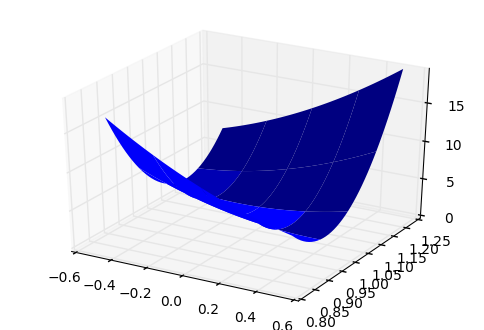

In [133]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w0, w1, costArray, #rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)
ax.set_zlim(0,costArray.max())

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [80]:
cost(0,0)

223

In [95]:
lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [103]:
data_x=np.array([1,3,8,7,9]).reshape(5,1)
data_y=np.array([1,3,7,8,10]).reshape(5,1)

In [105]:
res=lr.fit(data_x,data_y)

In [110]:
print(res.coef_)
print(res.intercept_)

[[ 1.05084746]]
[-0.08474576]


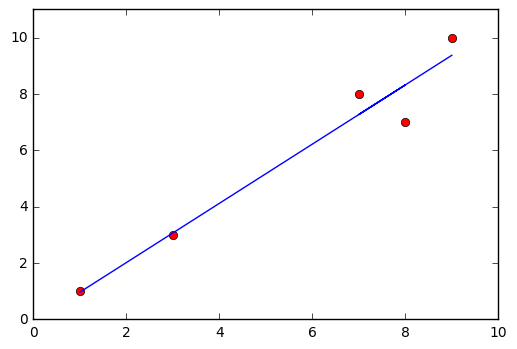

In [121]:
plt.plot(data_x.flatten(),data_y.flatten(),'ro',data_x.flatten(),res.predict(data_x).flatten())
plt.axis([0,10,0,11])
plt.show()

In [125]:
cost(-.08,1.05)

2.677999999999999